# Regressing 2D Data with a Single Neuron

This notebook provides you with a complete code example that loads the data contained in `data_reg_2d_clean.csv`, trains a neuron to fit them, and finally uses the trained neuron to predict the values of the data in `data_reg_2d_clean_test.csv`.

## Loading the Data

In [4]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_2d_clean.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[ 0.09539425  0.62586094]
 [ 1.38026523  1.66483856]
 [ 0.88323335  1.21737326]
 [ 0.00583365  0.01259322]
 [-0.65958948  0.39365817]
 [-0.15699403  0.54888271]
 [-0.20260499 -0.48191721]
 [-1.04782585  0.34934672]
 [ 1.72214286 -0.10788593]
 [-0.34130321  0.26006667]]
y_gt: [[ 0.7304667 ]
 [ 0.48457333]
 [ 0.53413991]
 [ 0.20675957]
 [ 1.25324765]
 [ 0.90587675]
 [-0.07931222]
 [ 1.59717256]
 [-1.63002878]
 [ 0.80136988]]


## Visualizing the Data

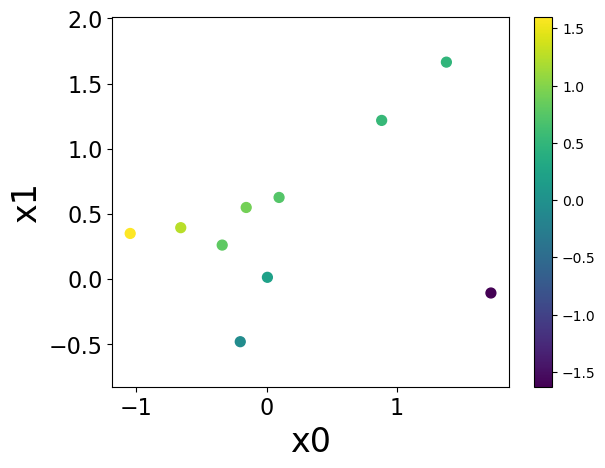

In [6]:
from plotting import plot_data_2d

plot_data_2d(x, y_gt, fig_name="fig_02_06.pdf")  ### plot_data_2d(x, y_gt)

## Implementing a Neuron with Multiple Inputs

Create a single neuron with one vectorial weigth `w` and one vectorial input `x` (which can also be a 2D numpy vector if there are multiple imput vectors) ...

In [7]:
def neuron_reg_2d(w0, x):
    """Artificial neuron for multidimensional regression."""
    return x @ w

... randomly initialize its weight vector ...

In [13]:
from numpy.random import default_rng

rng = default_rng()
w = rng.standard_normal(size=(2,))

... obtain its prediction `y_p` for the input data (which has the same shape as `x`) ...

In [14]:
y_p = neuron_reg_2d(w, x)

... and visualize its predictions.

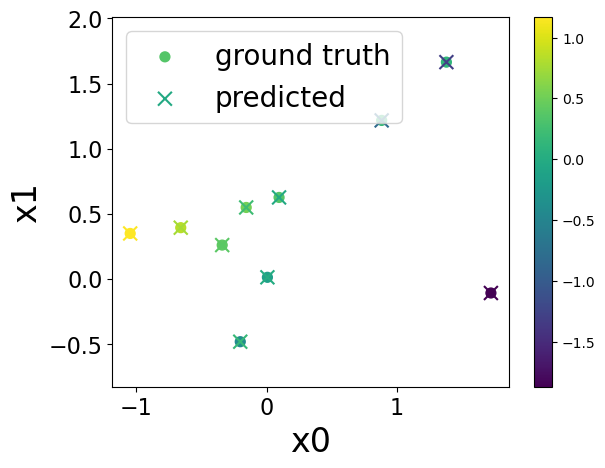

In [15]:
from plotting import plot_pred_2d

plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x), fig_name="fig_02_07.pdf")  ### plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x))

## Training the Neuron

Train the neuron ...

In [16]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # Select random sample.
    x_selected = x[selected]
    y_gt_selected = y_gt[selected]
    
    y_p_selected = neuron_reg_2d(w, x_selected) # Neuron prediction.
    
    error = y_p_selected - y_gt_selected # Calculate error.
    
    w -= eta * error * x_selected # Update neuron weight.

    print(f"i={i} w0={w[0]:.2f} w1={w[1]:.2f} error={error[0]:.2f}")

i=0 w0=-1.12 w1=0.12 error=-0.43
i=1 w0=-1.16 w1=0.14 error=-0.38
i=2 w0=-1.16 w1=0.14 error=-0.21
i=3 w0=-1.19 w1=0.15 error=-0.43
i=4 w0=-1.19 w1=0.15 error=-0.21
i=5 w0=-0.93 w1=0.47 error=-1.87
i=6 w0=-0.94 w1=0.49 error=-0.50
i=7 w0=-0.87 w1=0.59 error=-0.76
i=8 w0=-0.88 w1=0.59 error=0.06
i=9 w0=-0.93 w1=0.60 error=-0.47
i=10 w0=-0.93 w1=0.60 error=-0.04
i=11 w0=-0.82 w1=0.73 error=-0.76
i=12 w0=-0.87 w1=0.75 error=-0.48
i=13 w0=-0.81 w1=0.82 error=-0.45
i=14 w0=-0.78 w1=0.86 error=-0.24
i=15 w0=-0.76 w1=0.88 error=-0.13
i=16 w0=-0.80 w1=0.88 error=0.23
i=17 w0=-0.80 w1=0.87 error=-0.18
i=18 w0=-0.80 w1=0.89 error=-0.26
i=19 w0=-0.79 w1=0.91 error=-0.11
i=20 w0=-0.79 w1=0.91 error=-0.20
i=21 w0=-0.79 w1=0.91 error=-0.20
i=22 w0=-0.83 w1=0.92 error=-0.46
i=23 w0=-0.82 w1=0.94 error=-0.09
i=24 w0=-0.83 w1=0.95 error=-0.28
i=25 w0=-0.87 w1=0.96 error=-0.40
i=26 w0=-0.88 w1=0.95 error=-0.21
i=27 w0=-0.88 w1=0.95 error=-0.20
i=28 w0=-0.87 w1=0.97 error=-0.22
i=29 w0=-0.87 w1=0.97 erro

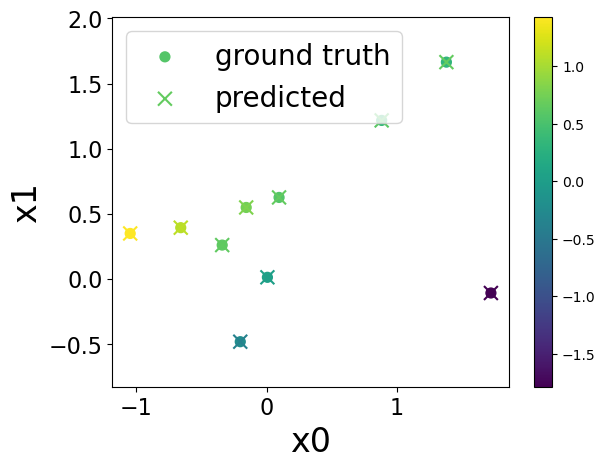

In [17]:
plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x), fig_name="fig_02_08.pdf")  ### plot_pred_2d(x, y_gt, y_p=neuron_reg_2d(w, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

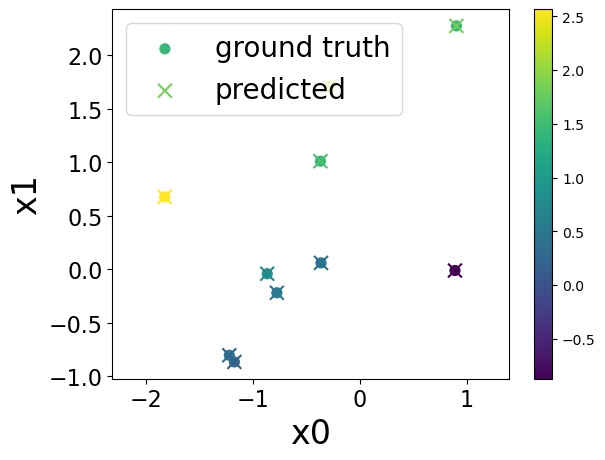

In [18]:
(x_test, y_gt_test) = load_data(filename="data_reg_2d_clean_test.csv")

plot_pred_2d(x_test, y_gt_test, y_p=neuron_reg_2d(w, x_test))